# Анализ кластеров

### Классификация политических режимов

У нас имеется датасет, содержащий данные о странах и теория, что все страны можно отнести к одному из четырех видов, так называемая теория Даля. Сегодня мы попробуем применить ее на практике и постараться выделить 4 кластера в данных по политическому устройству стран. Подробнее прочитать про датасет можно по [ссылке](https://www3.nd.edu/~mcoppedg/crd/Codebook.doc).

Импортируем модуль pandas.

In [1]:
import pandas as pd

Загрузим наш датасет и посмотрим что находится внутри.

In [2]:
data = pd.read_csv('DahlDims.csv')
data.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
0,Afghanistan,AFGN,1950,50,-1.150339342,-1.013598554,-1.011842735,-0.741150814,-1.150339342,-1.013598554,...,,,4,700,AFG,AFG,0.15,0.09,1.01,0.82
1,Afghanistan,AFGN,1951,51,-1.109144219,-0.956002727,-0.990235662,-0.790842427,-1.109144219,-0.956002727,...,,,4,700,AFG,AFG,0.13,0.06,1.01,0.89
2,Afghanistan,AFGN,1952,52,-1.106897206,-0.839698187,-1.011173094,-0.804507241,-1.106897206,-0.839698187,...,,,4,700,AFG,AFG,0.14,0.01,1.04,0.97
3,Afghanistan,AFGN,1953,53,-1.104317508,-0.675316224,-1.018490208,-0.547784602,-1.104317508,-0.675316224,...,,,4,700,AFG,AFG,0.13,0.06,1.04,0.90
4,Afghanistan,AFGN,1954,54,-1.107440167,-0.497937884,-1.061737774,-0.453082232,-1.107440167,-0.497937884,...,,,4,700,AFG,AFG,0.09,0.01,1.04,0.93


В нашем датасете есть 28 колонок, но работать мы будем с 2 из них. Это колонки CONTEST и INCLUS.
Строить мы будем распределение стран по этим параметрам за определенные год, например за 2000.

Сохраним отдельно данные по странам за 2000 год.

In [3]:
year_2000_data = data[data.year == 2000]

Проверим данные.

In [4]:
year_2000_data.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
50,Afghanistan,AFGN,2000,2000,-1.860250763,-3.632547535,-1.177129448,-1.956969586,,,...,,,4,700,AFG,AFG,0.525,0.495,0.915,0.675
101,Albania,ALBN,2000,2000,-0.055792334,0.529475222,0.473950014,0.852395775,,,...,,,8,339,ALB,ALB,0.525,0.495,0.915,0.675
140,Algeria,ALGR,2000,2000,-1.021945168,0.513831312,-0.410079829,0.841836136,,,...,,,12,615,DZA,DZA,0.525,0.495,0.915,0.675
191,Andorra,ANDO,2000,2000,0.400964891,-0.173187886,0.891882876,0.378098177,,,...,,,20,232,AND,ADO,0.525,0.495,0.915,0.675
217,Angola,ANGL,2000,2000,-1.36415187,-0.021909254,-0.723198961,0.480211254,,,...,,,24,540,AGO,AGO,0.525,0.495,0.915,0.675


Все верно, у нас данные по странам только за 2000 год. Теперь узнаем сколько в нашей выборке стран.

In [5]:
len(year_2000_data)

192

Всего 192 страны. Построим график наших стран за 2000 год.
Переведем из строкового типа в численный

In [6]:
x = pd.to_numeric(year_2000_data["INCLUS"]).values
y = pd.to_numeric(year_2000_data["CONTEST"]).values

Импортируем модуль рисования и построим график, где на оси X у нас колонка INCLUS, а по y - CONTEST. Дополнительно проведенем линии через начало координат.

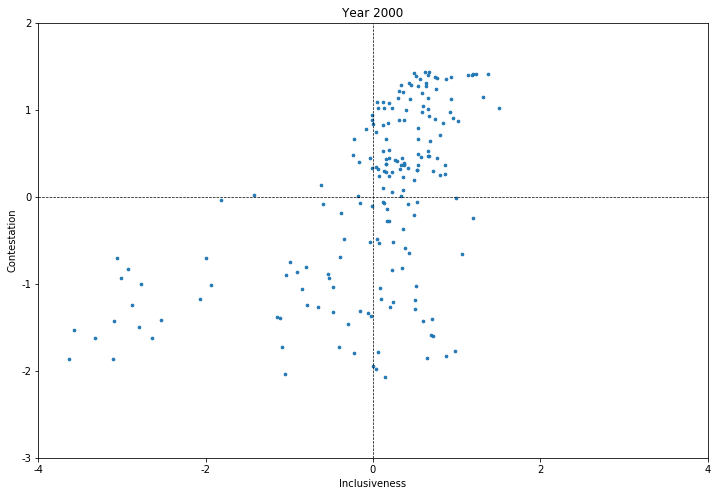

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12, 8))
plt.scatter(x,y, s =7)
plt.title('Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

### Кластеризация с помощью KMeans

Кластеризатор KMeans разбивает множество элементов векторного пространства на заранее известное число кластеров k. Он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

Импортируем модуль KMeans из sklearn.

In [8]:
from sklearn.cluster import KMeans

Вытащим данные для обучения, это только столбцы INCLUS и CONTEST.

In [9]:
X = year_2000_data[['INCLUS','CONTEST']]

Изначально теоритически мы знаем, что в наших данных 4 кластера. Поэтому инициализируем KMeans с таким количеством кластеров, передав их в параметр n_clusters

In [10]:
kmeans = KMeans(n_clusters = 4, random_state = 0)

Теперь обучим кластерезатор на всех данных

In [11]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Посмотрим как наши данные пометились.

In [12]:
kmeans.labels_

array([2, 1, 0, 1, 0, 1, 3, 1, 3, 3, 0, 1, 2, 1, 1, 0, 3, 1, 3, 0, 3, 1,
       3, 3, 2, 1, 0, 2, 0, 0, 3, 1, 1, 0, 3, 0, 1, 2, 2, 0, 3, 1, 1, 0,
       3, 3, 3, 1, 1, 3, 1, 0, 3, 0, 0, 3, 1, 0, 3, 3, 0, 0, 1, 3, 1, 3,
       1, 1, 1, 0, 3, 1, 3, 3, 3, 1, 1, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 1,
       0, 3, 2, 0, 0, 3, 1, 1, 0, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       3, 3, 1, 3, 1, 3, 0, 1, 2, 1, 1, 1, 3, 3, 3, 1, 1, 3, 2, 2, 1, 3,
       3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 3, 3, 1,
       2, 3, 3, 1, 1, 1, 1, 0, 1, 0, 3, 3, 0, 3, 0, 1, 1, 1, 0, 2, 3, 0,
       1, 0, 1, 0, 1, 2, 3, 3, 3, 0, 1, 1, 0, 0, 1, 0], dtype=int32)

Всем нашим данным были присвоены лейблы от 0 до 3.

Создадим новый Датафрейм, в который поместим столбцы INCLUS, CONTEST и новый столбец Labels в котором мы будем хранить помеченные кластерезатором данные.

In [13]:
draw = pd.DataFrame({'INCLUS': x,
                   'CONTEST': y,
                   'Labels': kmeans.labels_})

Теперь давайте построим тот же график что и в начале, но уже с окраской кластеров. Для этого используем seaborn.

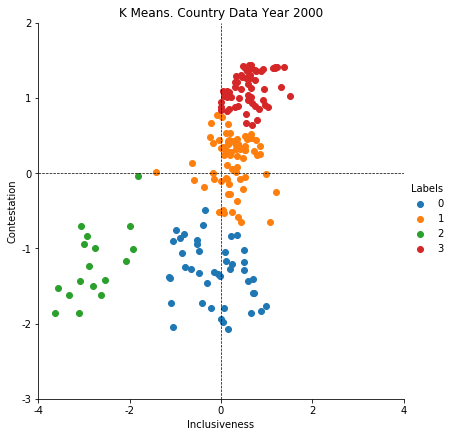

In [14]:
import seaborn as sns

sns.FacetGrid(draw, hue="Labels", height=6) \
   .map(plt.scatter, "INCLUS", "CONTEST") \
   .add_legend()

plt.title('K Means. Country Data Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

На рисунке отчетливо видно 4 кластера.

### Как узнать количество кластеров?

В нашем датасете, благодаря теории, которая стояла за ним, мы знали что у нас 4 кластера. Но что если количество кластеров нам не известно? Мы все же можем определить "оптимальное" количество кластеров и в этом нам опять поможет кластерезатор KMeans.

Импортируем модуль для рисования

In [15]:
import pylab as pl

Будем пробовать брать разнное количество кластеров и смотреть как это будет влиять на score модели. Количество кластеров будет варьироваться от 1 до 20.

In [16]:
Nc = range(1, 20)

Создадим список кластеризаторов Kmeans, с разным количеством предполагаемых кластеров

In [17]:
kmeans = [KMeans(n_clusters=i) for i in Nc]

Посчитаем теперь для каждого из них score.

In [18]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

А теперь посстроим график, так называемой Elbow curve

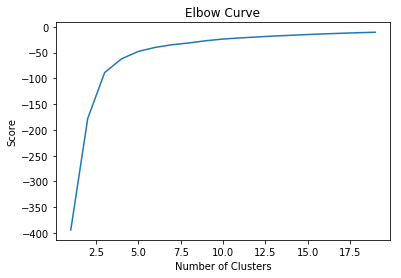

In [19]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Оптимальное количество кластеров находится в месте перелома графика. У нас это происходит где-то в районе 3х кластеров. Давайте построим график для 2000 года уже с 3-я кластерами и посмотрим как будет выглядеть график.

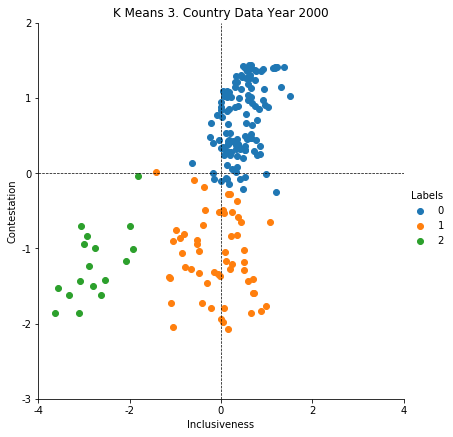

In [20]:
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(X)

draw_3 = pd.DataFrame({'INCLUS': x,
                   'CONTEST': y,
                   'Labels': kmeans_3.labels_})

sns.FacetGrid(draw_3, hue="Labels", height=6) \
   .map(plt.scatter, "INCLUS", "CONTEST") \
   .add_legend()

plt.title('K Means 3. Country Data Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

Посмотрим как выглядели данные в 1950 году ( когда было записано первое наблюдение из нашего датасета). Проделаем все операции как и для данных 2000 года.

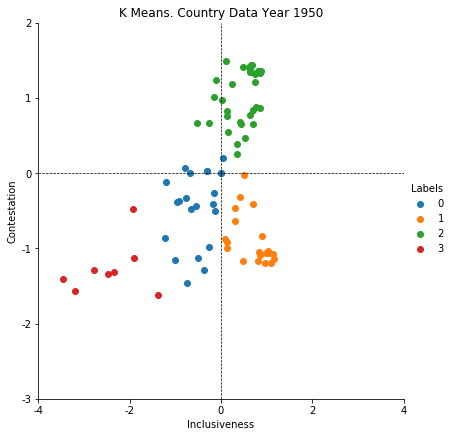

In [21]:
year_1950_data = data[data.year == 1950]
x = pd.to_numeric(year_1950_data["INCLUS"]).values
y = pd.to_numeric(year_1950_data["CONTEST"]).values
X = year_1950_data[['INCLUS','CONTEST']]

kmeans_1950 = KMeans(n_clusters=4, random_state=0).fit(X)

draw_1950 = pd.DataFrame({'INCLUS': x,
                   'CONTEST': y,
                   'Labels': kmeans_1950.labels_})

sns.FacetGrid(draw_1950, hue="Labels", height=6) \
   .map(plt.scatter, "INCLUS", "CONTEST") \
   .add_legend()

plt.title('K Means. Country Data Year 1950')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()